In [1]:
import numpy as np
from fractions import Fraction

P = np.array([
    [Fraction(1,6), Fraction(1,12), Fraction(1,6)],
    [Fraction(1,6), Fraction(1,6),  Fraction(1,4)]
])
X = np.array([-2, -1, 0])
Y = np.array([1, 2])

p1 = P[1,1]
p2 = P[0,2] 
total = p1 + p2
EY_given = (2*p1 + 1*p2) / total
print("E(Y | X+Y=1) =", float(EY_given), "=", EY_given)


PY = P.sum(axis=1)

PX_given_Y1 = P[0] / PY[0]
EX_given_Y1 = sum(X * PX_given_Y1)

PX_given_Y2 = P[1] / PY[1]
EX_given_Y2 = sum(X * PX_given_Y2)

PX = P.sum(axis=0)
EX = sum(X * PX)

var_EX_given_Y = PY[0]*(EX_given_Y1-EX)**2 + PY[1]*(EX_given_Y2-EX)**2
print("Var(E(X|Y)) =", float(var_EX_given_Y), "=", Fraction(var_EX_given_Y).limit_denominator())

var_X_given_Y1 = sum((X-EX_given_Y1)**2 * PX_given_Y1)

var_X_given_Y2 = sum((X-EX_given_Y2)**2 * PX_given_Y2)

E_var_X_given_Y = PY[0]*var_X_given_Y1 + PY[1]*var_X_given_Y2
print("E[Var(X|Y)] =", float(E_var_X_given_Y), "=", Fraction(E_var_X_given_Y).limit_denominator())

E(Y | X+Y=1) = 1.5 = 3/2
Var(E(X|Y)) = 0.00496031746031746 = 5/1008
E[Var(X|Y)] = 0.7380952380952381 = 31/42


E(X)= y∑E(X∣Y=y)⋅P(Y=y)

In [2]:
import numpy as np

PX = {30: 0.9, 60: 0.1}
EY_given_X = {30: 3, 60: 2}

EX = sum(x * PX[x] for x in PX)

EY = sum(PX[x] * EY_given_X[x] for x in PX)

EX_EY_given_X = sum(x * EY_given_X[x] * PX[x] for x in PX)

Cov_XY = EX_EY_given_X - EX * EY

E_EY_given_X2 = sum(PX[x] * EY_given_X[x]**2 for x in PX)
Var_EY_given_X = E_EY_given_X2 - EY**2

print(f"E(X) = {EX}")
print(f"E(Y) = {EY}")
print(f"E(X * E(Y|X)) = {EX_EY_given_X}")
print(f"Cov(X, Y) = {Cov_XY}")
print(f"Var(E(Y|X)) = {Var_EY_given_X}")

E(X) = 33.0
E(Y) = 2.9000000000000004
E(X * E(Y|X)) = 93.0
Cov(X, Y) = -2.700000000000017
Var(E(Y|X)) = 0.08999999999999808


Формула полного математического ожидания:
\[
\mathbb{E}(X) = \sum_{y} \mathbb{E}(X|Y=y) \cdot P(Y=y)
\]

In [3]:
from fractions import Fraction


P = [
    [Fraction(1,12), Fraction(1,12), Fraction(5,24)],  # Y=2, X=0,1,2
    [Fraction(1,8),  Fraction(1,4),  Fraction(1,4)]    # Y=3, X=0,1,2
]
X = [0, 1, 2]
Y = [2, 3]

# P(Y)
PY = [sum(P[0]), sum(P[1])]

# P(X|Y)
PX_given_Y2 = [p / PY[0] for p in P[0]]
PX_given_Y3 = [p / PY[1] for p in P[1]]

# Z = E(X^2|Y) + Y^2
EX2_given_Y2 = sum(x**2 * px for x, px in zip(X, PX_given_Y2))
Z2 = EX2_given_Y2 + Y[0]**2

EX2_given_Y3 = sum(x**2 * px for x, px in zip(X, PX_given_Y3))
Z3 = EX2_given_Y3 + Y[1]**2

print(f"Z при Y=2: {Z2} с вероятностью {PY[0]}")
print(f"Z при Y=3: {Z3} с вероятностью {PY[1]}")

# E(Z)
EZ = Z2 * PY[0] + Z3 * PY[1]
print(f"E(Z) = {EZ}")

Z при Y=2: 58/9 с вероятностью 3/8
Z при Y=3: 11 с вероятностью 5/8
E(Z) = 223/24


# 10.5

In [1]:
import numpy as np
from fractions import Fraction


n_dice = 36  
p_six = Fraction(1, 6)  

mean_dice_second = n_dice * p_six
print(f"Среднее количество костей во втором броске = {mean_dice_second}")

# Для одной кости:
# Среднее значение (1+2+3+4+5+6)/6 = 3.5
mean_one_dice = Fraction(7, 2)
print(f"Среднее значение для одной кости = {mean_one_dice}")

# Дисперсия для одной кости: E(X^2) - (E(X))^2
# E(X^2) = (1^2 + 2^2 + 3^2 + 4^2 + 5^2 + 6^2)/6 = 91/6
# Var(X) = 91/6 - (7/2)^2 = 35/12
E_X2_one_dice = Fraction(91, 6)
var_one_dice = E_X2_one_dice - mean_one_dice**2
print(f"Дисперсия для одной кости = {var_one_dice}")

# Дисперсия числа костей во втором броске (биномиальное распределение)
var_N = n_dice * p_six * (1 - p_six)
print(f"Дисперсия числа костей во втором броске = {var_N}")

# E(S) - математическое ожидание суммы очков во втором броске
E_S = mean_dice_second * mean_one_dice
print(f"\nE(S) = {float(E_S)} = {E_S}")

# Var(S) - используем формулу для дисперсии суммы случайного числа случайных величин
# Var(S) = E(N)*Var(X) + Var(N)*E(X)^2
Var_S = mean_dice_second * var_one_dice + var_N * mean_one_dice**2
print(f"Var(S) = {float(Var_S)} = {Var_S}")

# Дополнительно выведем стандартное отклонение
std_S = float(Var_S) ** 0.5
print(f"Стандартное отклонение σ(S) = {std_S:.4f}")

Среднее количество костей во втором броске = 6
Среднее значение для одной кости = 7/2
Дисперсия для одной кости = 35/12
Дисперсия числа костей во втором броске = 5

E(S) = 21.0 = 21
Var(S) = 78.75 = 315/4
Стандартное отклонение σ(S) = 8.8741


Среднее количество шестерок: 5.99
Средняя сумма во втором броске: 20.76


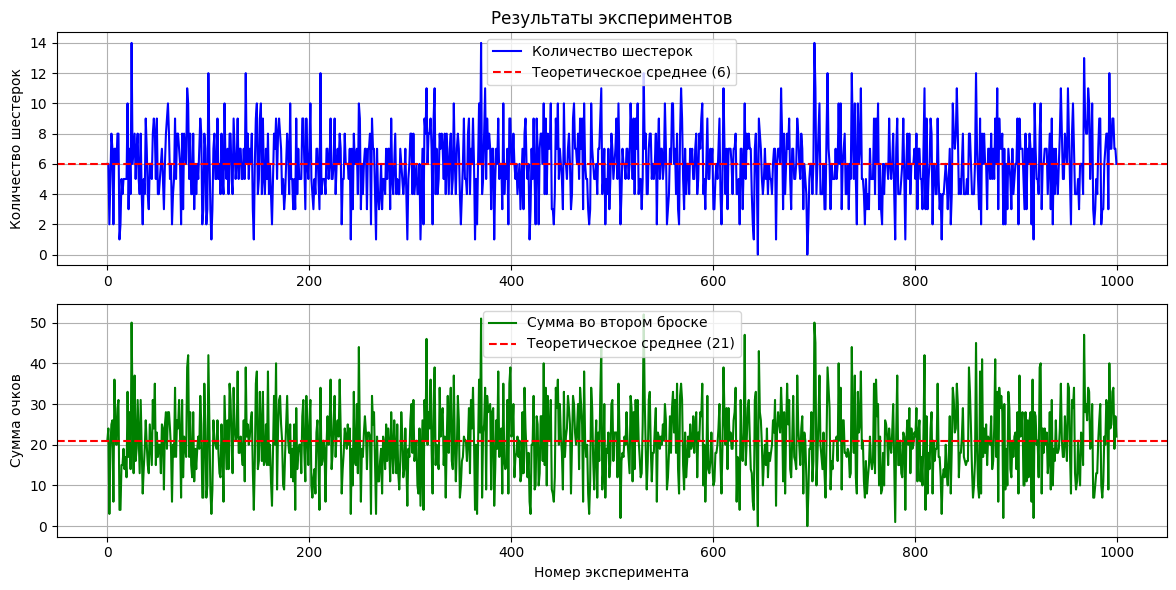

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_experiment():
    first_roll = np.random.randint(1, 7, size=36)
    sixes = np.sum(first_roll == 6)
    
    if sixes > 0:
        second_roll = np.random.randint(1, 7, size=sixes)
        second_sum = np.sum(second_roll)
    else:
        second_sum = 0
        
    return sixes, second_sum

# Проведем 100 экспериментов для более наглядного графика
np.random.seed(42)
experiments = 1000

# Массивы для хранения результатов
sixes_array = []
sums_array = []

# Проводим эксперименты
for i in range(experiments):
    sixes, second_sum = simulate_experiment()
    sixes_array.append(sixes)
    sums_array.append(second_sum)

# Создаем график
plt.figure(figsize=(12, 6))

# Создаем два подграфика с общей осью X
plt.subplot(211)
plt.plot(sixes_array, 'b-', label='Количество шестерок')
plt.axhline(y=6, color='r', linestyle='--', label='Теоретическое среднее (6)')
plt.legend()
plt.grid(True)
plt.title('Результаты экспериментов')
plt.ylabel('Количество шестерок')

plt.subplot(212)
plt.plot(sums_array, 'g-', label='Сумма во втором броске')
plt.axhline(y=21, color='r', linestyle='--', label='Теоретическое среднее (21)')
plt.legend()
plt.grid(True)
plt.xlabel('Номер эксперимента')
plt.ylabel('Сумма очков')

plt.tight_layout()

# Выведем также средние значения
print(f"Среднее количество шестерок: {np.mean(sixes_array):.2f}")
print(f"Средняя сумма во втором броске: {np.mean(sums_array):.2f}")

plt.show()

Теоретические значения:
E(S) = 15.0 = 15
Var(S) = 1405.0 = 1405

Результаты симуляции (10000 экспериментов):
E(S) ≈ 15.0264
Var(S) ≈ 288.0515


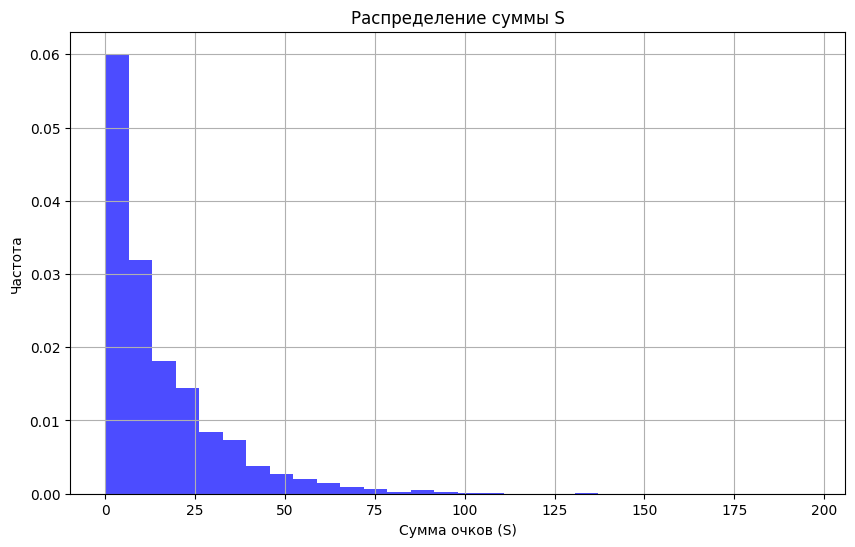

In [8]:
import numpy as np
from fractions import Fraction

def simulate_until_six():
    rolls = []
    while True:
        roll = np.random.randint(1, 7)
        if roll == 6:
            return sum(rolls)  # сумма всех бросков кроме последнего
        rolls.append(roll)

# Теоретический расчет
p_six = Fraction(1, 6)  # вероятность выпадения 6
p_not_six = Fraction(5, 6)  # вероятность не выпадения 6

# E(S) = p(первый бросок 6) * 0 + p(не 6 в первый раз) * (среднее значение не-6 + E(S))
# E(S) = 0 * (1/6) + (5/6) * (15/5 + E(S))
# E(S) = (5/6) * (3 + E(S))
# E(S) = 15

# Расчет E(S)
E_not_six = Fraction(15, 5)  # среднее значение при выпадении не-6 (среднее 1,2,3,4,5)
E_S = (p_not_six * E_not_six) / p_six

# Расчет Var(S)
# Используем формулу: Var(S) = E(S^2) - (E(S))^2
# E(S^2) можно найти аналогично E(S)

E_not_six_squared = Fraction(55, 5)  # среднее значение квадратов (1^2 + 2^2 + 3^2 + 4^2 + 5^2)/5
Var_S = (p_not_six * (E_not_six_squared + 2*E_not_six*E_S + E_S**2)) / p_six - E_S**2

print(f"Теоретические значения:")
print(f"E(S) = {float(E_S)} = {E_S}")
print(f"Var(S) = {float(Var_S)} = {Var_S}")

# Проверка через симуляцию
np.random.seed(42)
n_experiments = 10000
results = [simulate_until_six() for _ in range(n_experiments)]

print(f"\nРезультаты симуляции ({n_experiments} экспериментов):")
print(f"E(S) ≈ {np.mean(results):.4f}")
print(f"Var(S) ≈ {np.var(results):.4f}")

# Построим гистограмму распределения S
plt.figure(figsize=(10, 6))
plt.hist(results, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Распределение суммы S')
plt.xlabel('Сумма очков (S)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()